[IPython Notebook](binary_pulsations.ipynb) |  [Python Script](binary_pulsations.py)

Binary with Pulsations
============================

**NOTE: pulsations are currently being tested but not yet supported**

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.Bundle.default_binary()

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Adding Pulsations
---------------------

Let's add one pulsation to each of our stars in the binary.

A pulsation is a feature, and needs to be attached directly to a component upon creation.  Providing a tag for 'feature' is entirely optional - if one is not provided it will be created automatically.

In [3]:
b.add_feature('pulsation', component='primary', feature='puls01')

<ParameterSet: 2 parameters | qualifiers: freq, relampl>

In [4]:
b.add_feature('pulsation', component='secondary', feature='puls02')

<ParameterSet: 2 parameters | qualifiers: freq, relampl>

Pulsation Parameters
-----------------

Pulsations are defined by a frequency and amplitude

In [5]:
print b['puls01']

freq@puls01@feature: 1.0 1 / d
relampl@puls01@feature: 1.1


In [6]:
b.set_value('freq', feature='puls01', value=0.1)

In [7]:
b.set_value('relampl', feature='puls01', value=1.01)

In [8]:
times = np.linspace(0,4,8)
b.add_dataset('MESH', time=times)

<ParameterSet: 1 parameters>

In [9]:
b['period@orbit'] = 1000

In [10]:
b.run_compute()

<ParameterSet: 386 parameters | components: primary, secondary>

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):



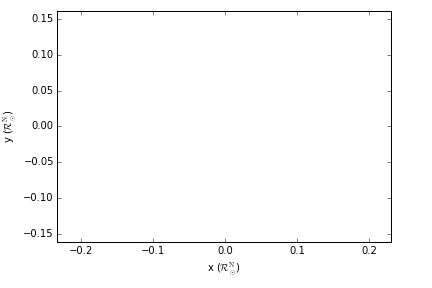
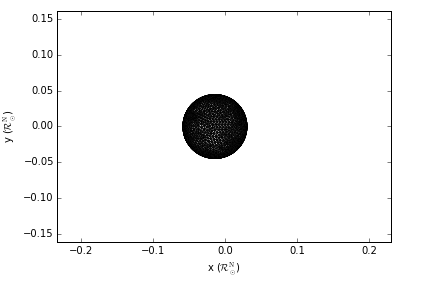
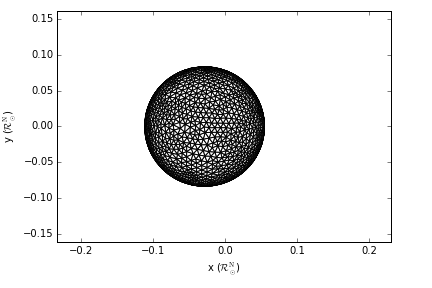
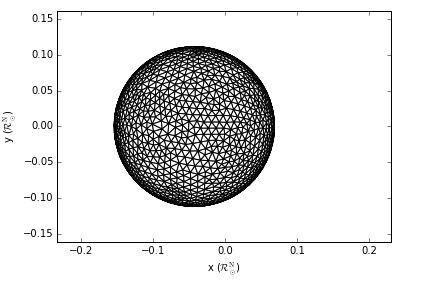
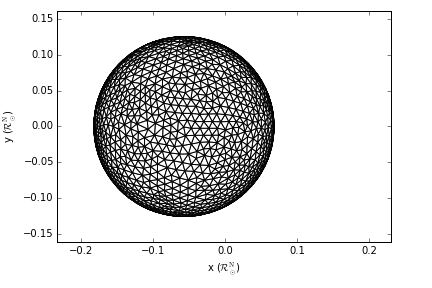
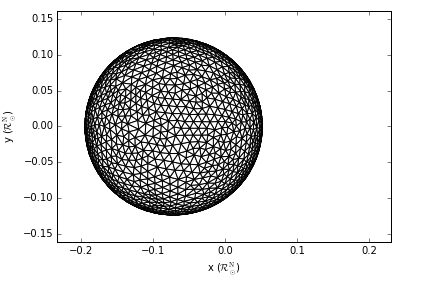
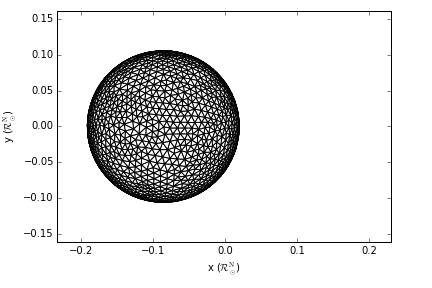
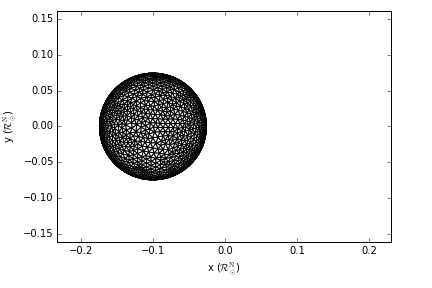

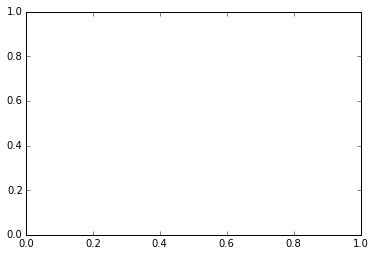

In [11]:
b.animate(component='primary', time=times)